In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from currency_converter import CurrencyConverter
c = CurrencyConverter()

# Coca Cola vs Pepsi

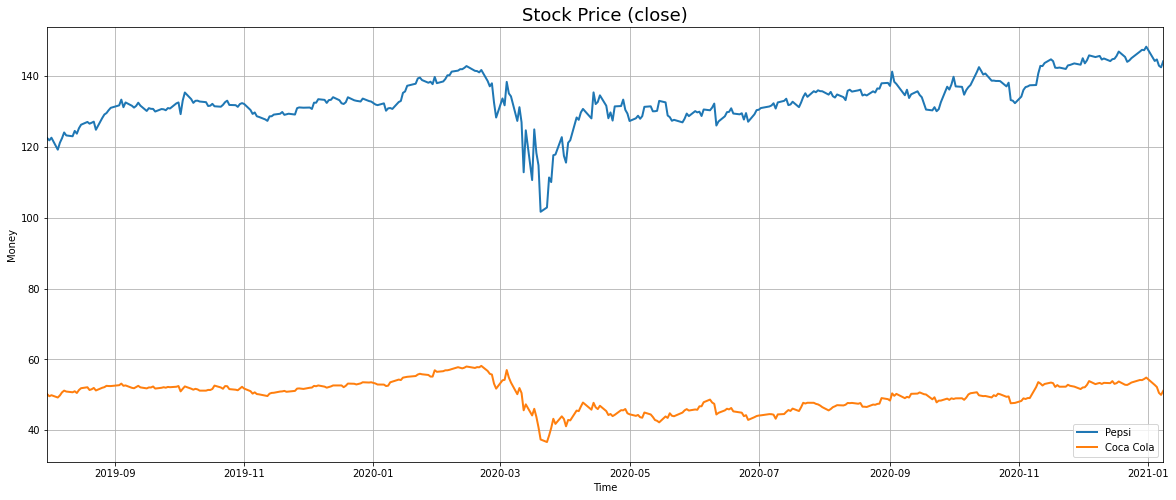

In [2]:
# Data
cola = yf.Ticker("KO")
cola_hist = cola.history(period="max")
pepsi = yf.Ticker("PEP")
pepsi_hist = pepsi.history(period="max")

# Paramters
title = 'Stock Price (close)'
title_size = 18
line_width = 2
xlabel = 'Time'
ylabel = 'Money'
legend = ['Pepsi', 'Coca Cola']
legend_loc = 'lower right'
num_days = 365*1

# Chart
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(
    pepsi_hist.index.tolist()[-num_days:], 
    pepsi_hist.Close.tolist()[-num_days:],
    label=legend[0],
    linewidth=line_width
)
ax.plot(
    cola_hist.index.tolist()[-num_days:], 
    cola_hist.Close.tolist()[-num_days:],
    label=legend[1],
    linewidth=line_width
)
ax.legend(loc=legend_loc)
ax.set_title(title, fontsize=title_size)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.margins(x=0)
ax.grid()



# Watch List

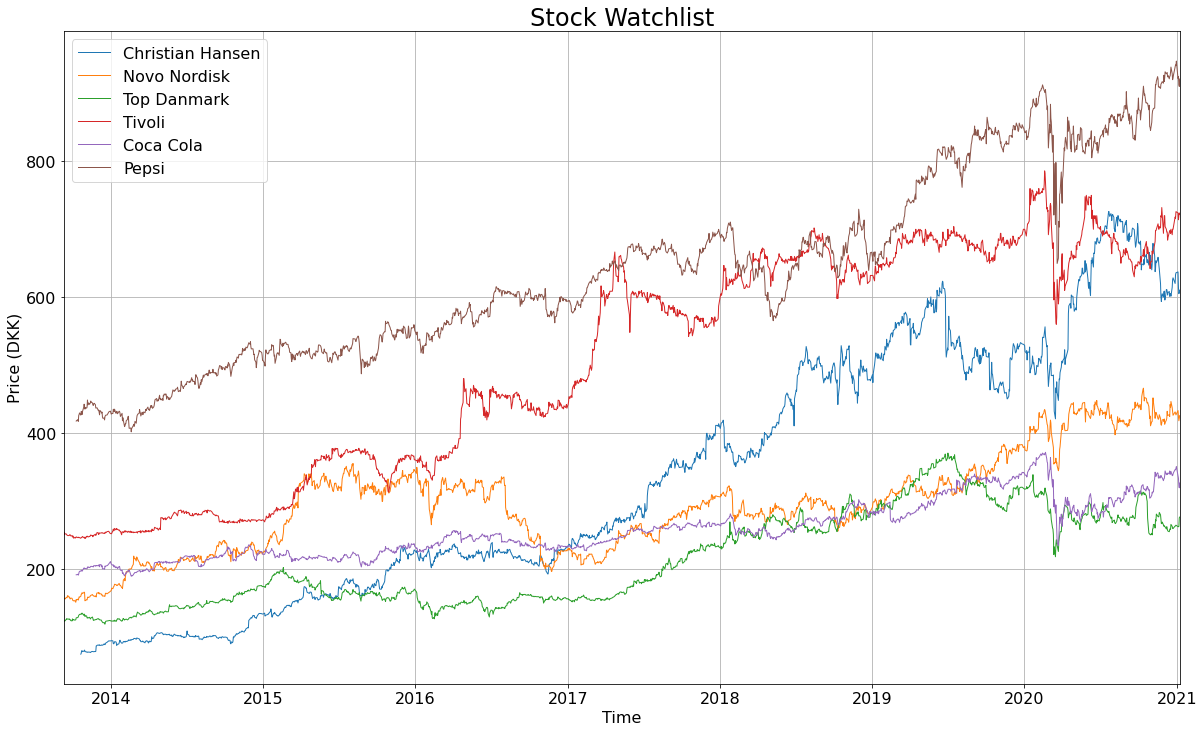

In [134]:
# Data
watchlist = {
    'Christian Hansen': yf.Ticker("51C.F"),
    'Novo Nordisk': yf.Ticker("NOVO-B.CO"),
    'Top Danmark': yf.Ticker("TOP.CO"),
    'Tivoli': yf.Ticker("TIV.CO"),
    'Coca Cola': yf.Ticker("KO"),
    'Pepsi': yf.Ticker("PEP"),
}
period = "max"
interval = '1d'
num_days = 365*5

# Plot Paramters
text_title = 'Stock Watchlist'
text_xlabel = 'Time'
text_ylabel = 'Price (DKK)'
text_legend = None
fontsize_title = 24
fontsize_legend = 16
fontsize_label = 16
fontsize_ticks = 16
loc_legend = 'upper left'
width_line = 1

# Chart
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot() 

for stock in watchlist.keys():

    # extract time and price axes
    axis_time = watchlist[stock].history(period=period, interval=interval).index.tolist()[-num_days:]
    axis_price = watchlist[stock].history(period=period, interval=interval).Close.tolist()[-num_days:]
    
    # if not DKK, convert
    currency = watchlist[stock].info['currency'] 
    if currency != 'DKK':
        axis_price = [c.convert(price, currency, 'DKK') for price in axis_price]
    
    # plot stock price
    ax.plot(
        axis_time,
        axis_price,
        label=stock,
        linewidth=width_line
    )
    
ax.legend(loc=loc_legend, fontsize=fontsize_legend)
ax.set_title(text_title, fontsize=fontsize_title)
ax.set_xlabel(text_xlabel, fontsize=fontsize_label)
ax.set_ylabel(text_ylabel, fontsize=fontsize_label)
[tick.label.set_fontsize(fontsize_ticks) for tick in ax.xaxis.get_major_ticks()]
[tick.label.set_fontsize(fontsize_ticks) for tick in ax.yaxis.get_major_ticks()]
ax.margins(x=0)
ax.grid()

# Watchlist Correlation Matrix Plot

<ipython-input-100-9317f92fac8a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=axes_labels)
<ipython-input-100-9317f92fac8a>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=axes_labels)
<ipython-input-100-9317f92fac8a>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


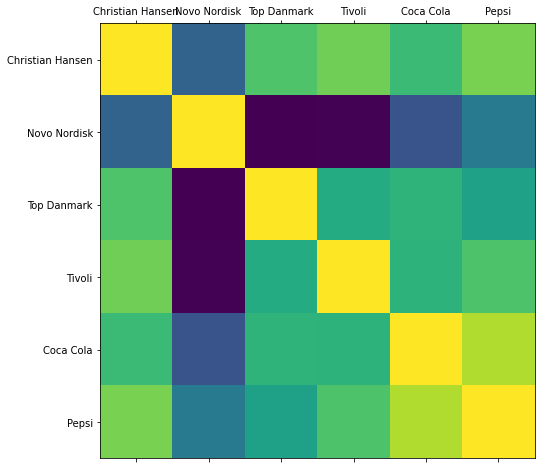

In [100]:
# Data
stocks = {}
for stock in watchlist.keys():
    stocks[stock] = watchlist[stock].history(period=period)[-num_days:].Close.tolist()
correlation_matrix = pd.DataFrame(stocks).corr()
    
# Parameters
axes_labels = list(watchlist.keys())
axes_labels.insert(0,'penis')

    
# Chart
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot()
ax.matshow(correlation_matrix)
ax.set_xticklabels(labels=axes_labels)
ax.set_yticklabels(labels=axes_labels)
fig.show()